# Intro to Natural Language Processing (NLP)

The Natural Language Processing (NLP) field is incredibly vast, and it has applications in virtually every aspect of data science. In this notebook, we will walk through a **very brief** survey of NLP, and provide some instruction on a couple handy tools along the way.

NLP tools span a wide range of implementations, and it is not uncommon for NLP packages to have conflicts with other Python libraries. So, to keep everything compatible in one place, it is recommended that you create a new pip environment for NLP projects. To set up an NLP pip environment for this lab, follow the steps in the "Pip Environment" section of the [Python Environment Setup page in Canvas](https://iu.instructure.com/courses/2181786/pages/week-1-%7C-python-environment-setup?module_item_id=30340853), and **use the *environment.yml* file provided in this folder.** This should install the packages you'll need for this lab.

Next, **[download a spaCy NLP model](https://spacy.io/models)** based on your preferences (in the NLP environment) so you can use the spaCy library installed in the environment.

*Optionally, if you prefer to use a different environment, install the following packages separately using pip: [Scikit-Learn](https://scikit-learn.org/stable/install.html#installing-the-latest-release), [spaCy](https://spacy.io/usage), [ScatterText](https://github.com/JasonKessler/scattertext#installation), [CorEx](https://ryanjgallagher.github.io/code/corex/example), and [vaderSentiment](https://github.com/cjhutto/vaderSentiment#installation).*

## Preprocessing

To illustrate preprocessing text data, we'll use the [spaCy](https://spacy.io/) package.

*spaCy is capable of **much** more than what we will use it for in this lab. More advanced implementations of spaCy may require knowledge outside the scope of this course.*

In [2]:
import pandas as pd
import spacy
from spacy import displacy
print(spacy.__version__)

3.7.4


In [3]:
!python -m spacy download en_core_web_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 35.8 MB/s eta 0:00:0000:0100:01
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')
%config InlineBackend.figure_formats = ['svg']

### Tokenizing

The very first part of dealing with text data is to collect each **term** or unitary element of text (e.g., words, punctuation, etc.) in the form of "tokens".

In [5]:
# depends on your choice of spaCy model
nlp = spacy.load('en_core_web_sm')

In [6]:
intro = '''The Natural Language Processing (NLP) field is incredibly vast,
and it has applications in virtually every aspect of data science.
In this notebook, we will walk through a **very brief** survey of NLP,
and provide some instruction on a couple handy tools along the way.
'''

doc = nlp(intro)

In [7]:
print([t.text for t in doc])

['The', 'Natural', 'Language', 'Processing', '(', 'NLP', ')', 'field', 'is', 'incredibly', 'vast', ',', '\n', 'and', 'it', 'has', 'applications', 'in', 'virtually', 'every', 'aspect', 'of', 'data', 'science', '.', '\n', 'In', 'this', 'notebook', ',', 'we', 'will', 'walk', 'through', 'a', '*', '*', 'very', 'brief', '*', '*', 'survey', 'of', 'NLP', ',', '\n', 'and', 'provide', 'some', 'instruction', 'on', 'a', 'couple', 'handy', 'tools', 'along', 'the', 'way', '.', '\n']


In [8]:
for i, sentence in enumerate(doc.sents):
    print(f"sentence {i+1}\n\n", sentence)

sentence 1

 The Natural Language Processing (NLP) field is incredibly vast,
and it has applications in virtually every aspect of data science.

sentence 2

 In this notebook, we will walk through a **very brief** survey of NLP,
and provide some instruction on a couple handy tools along the way.



In [9]:
df_intro = []

for token in doc:
    df_intro.append([
        token.text, token.lemma_, token.pos_, token.tag_, token.dep_,
        token.shape_, token.is_alpha, token.is_stop
    ])

In [10]:
df_intro = pd.DataFrame(columns=["text", "lemma_", "pos_", "tag_", "dep_", "shape_", "is_alpha", "is_stop"],
                        data=df_intro)

In [11]:
df_intro.sample(5)

,text,lemma_,pos_,tag_,dep_,shape_,is_alpha,is_stop
14,it,it,PRON,PRP,nsubj,xx,True,True
46,and,and,CCONJ,CC,cc,xxx,True,True
56,the,the,DET,DT,det,xxx,True,True
9,incredibly,incredibly,ADV,RB,advmod,xxxx,True,False
47,provide,provide,VERB,VB,conj,xxxx,True,False


What is a **stop word**?

In [12]:
df_intro[df_intro['is_stop']].sample(10)

,text,lemma_,pos_,tag_,dep_,shape_,is_alpha,is_stop
37,very,very,ADV,RB,advmod,xxxx,True,True
27,this,this,DET,DT,det,xxxx,True,True
8,is,be,AUX,VBZ,ROOT,xx,True,True
55,along,along,ADP,IN,prep,xxxx,True,True
13,and,and,CCONJ,CC,cc,xxx,True,True
46,and,and,CCONJ,CC,cc,xxx,True,True
48,some,some,DET,DT,det,xxxx,True,True
0,The,the,DET,DT,det,Xxx,True,True
19,every,every,PRON,DT,nummod,xxxx,True,True
31,will,will,AUX,MD,aux,xxxx,True,True


spaCy defines **lemmas** to be *"the base forms of words. For example, the lemma of `was` is `be`, and the lemma of `rats` is `rat`."*

In [13]:
t = nlp('running')[0]
t.lemma_

'run'

**Sentence Dependencies**

We can visualize some of these attributes (like the sentence dependencies) using [displacy](https://spacy.io/usage/visualizers).

In [14]:
doc = nlp('We can visualize these using displacy.')

In [15]:
displacy.render(doc, style='dep', options={'distance': 120})

Note: this isn't always going to be *exactly* accurate, but it's very good and still useful.

### Named Entity Recognition

Some words are **Named Entities**: locations like "Alaska", dates like "January 1st", companies like "Google", etc. spaCy can tag these using [Named Entity Recognition](https://spacy.io/usage/linguistic-features#named-entities).

In [16]:
doc = nlp('... locations like "Alaska", dates like "January 1st", companies like "Google", etc.')

In [17]:
displacy.render(doc, style='ent')

### Multiple Documents

*NLP Terms: A **document** is a collection of **tokens**, and a **corpus** is a collection of documents.*

When spaCy processes text, it runs it through a [pipeline](https://spacy.io/usage/processing-pipelines) of different models to store token attributes for each token. This is how we get the functionality above. Though, when we are tokenizing multiple documents, we might not need all of these [built-in components](https://spacy.io/usage/processing-pipelines#built-in). For example, we might just need enough to filter our text based on the analysis done.

For example, suppose we've determined that we want to the remove the following tokens from a dataset of [coffee reviews](https://www.kaggle.com/datasets/schmoyote/coffee-reviews-dataset/) (descriptions):

- stop words (except the lemma "not", to maintain the idea of object negation)
- punctuation
- numbers

In this case, we don't need NER, Dependency Labels, or Document Labels. Removing these processes from the spaCy pipeline will save us some time.

In [266]:
df_coffee = pd.read_csv('./data/coffee_analysis.csv')

In [19]:
df_coffee.drop_duplicates(subset='desc_1', inplace=True)

In [20]:
df_coffee.shape

(2092, 12)

In [21]:
print(df_coffee['desc_1'].sample().iloc[0])

Deep, rich, pungent. Fresh cantaloupe, tangerine zest, caramelly chocolate, sandalwood, magnolia-like flowers in aroma and cup. Roundly and sweetly brisk in structure; satiny in mouthfeel. Fruit, floral and sandalwood carry into a crisply drying though sweet-toned finish.


In [267]:
df_coffee['desc_1']

0       Evaluated as espresso. Sweet-toned, deeply ric...
1       Evaluated as espresso. Sweetly tart, floral-to...
2       Crisply sweet, cocoa-toned. Lemon blossom, roa...
3       Delicate, sweetly spice-toned. Pink peppercorn...
4       Deeply sweet, subtly pungent. Honey, pear, tan...
                              ...                        
2090    Crisply sweet, nut-toned. Almond brittle, pie ...
2091    Chocolaty, floral-framed. Cocoa nib, honeysuck...
2092    High-toned, enticingly sweet. Black cherry, na...
2093     Vibrantly sweet, subtly nuanced. Apricot, dar...
2094    Evaluated as espresso. Multi-layered, complex....
Name: desc_1, Length: 2095, dtype: object

In [270]:
# nlp.pipe returns a generator
docs = nlp.pipe(df_coffee['desc_1'], disable=['ner', 'parser', 'textcat'])

# save the spaCy objects into the DataFrame
#df_coffee['spacy_doc'] = list(docs)

In [293]:
#df_coffee['spacy_doc'] = list(docs)


In [294]:
def tokenizer(doc, join_tokens=False):
    '''
    Tokenize a single spaCy `doc`.

    join_tokens : bool
        Whether we want to return a list of strings or
        a list of lists. If True, join with space (" ").
    '''

    # collect lemmas that meet the following criteria:
    tokens = [w.lemma_.lower() for w in doc if
              (not w.is_stop
               and not w.is_punct
               and not w.like_num) \
              or (w.lemma_ == 'not')]

    if join_tokens:
        return ' '.join(tokens)
    else:
        return tokens

In [289]:
df_coffee['docs_clean'] = df_coffee['spacy_doc'].apply(tokenizer)

In [25]:
df_coffee[['desc_1', 'spacy_doc', 'docs_clean']].head()

,desc_1,spacy_doc,docs_clean
0,"Evaluated as espresso. Sweet-toned, deeply ric...","(Evaluated, as, espresso, ., Sweet, -, toned, ...","[evaluate, espresso, sweet, tone, deeply, rich..."
1,"Evaluated as espresso. Sweetly tart, floral-to...","(Evaluated, as, espresso, ., Sweetly, tart, ,,...","[evaluate, espresso, sweetly, tart, floral, to..."
2,"Crisply sweet, cocoa-toned. Lemon blossom, roa...","(Crisply, sweet, ,, cocoa, -, toned, ., Lemon,...","[crisply, sweet, cocoa, tone, lemon, blossom, ..."
3,"Delicate, sweetly spice-toned. Pink peppercorn...","(Delicate, ,, sweetly, spice, -, toned, ., Pin...","[delicate, sweetly, spice, tone, pink, pepperc..."
4,"Deeply sweet, subtly pungent. Honey, pear, tan...","(Deeply, sweet, ,, subtly, pungent, ., Honey, ...","[deeply, sweet, subtly, pungent, honey, pear, ..."


In [26]:
print(df_coffee['desc_1'].iloc[5])

Delicate, richly and sweetly tart. Dried hibiscus, fine musk, almond, sandalwood, raspberry in aroma and cup. Fruit-toned, deeply sweet structure with gently-expressed acidity; buoyant, satiny-smooth mouthfeel. The crisp, flavor-saturated finish is characterized by sweet-tart fruit and floral tones (raspberry, hibiscus).


In [27]:
print(df_coffee['docs_clean'].iloc[5])

['delicate', 'richly', 'sweetly', 'tart', 'dry', 'hibiscus', 'fine', 'musk', 'almond', 'sandalwood', 'raspberry', 'aroma', 'cup', 'fruit', 'tone', 'deeply', 'sweet', 'structure', 'gently', 'express', 'acidity', 'buoyant', 'satiny', 'smooth', 'mouthfeel', 'crisp', 'flavor', 'saturate', 'finish', 'characterize', 'sweet', 'tart', 'fruit', 'floral', 'tone', 'raspberry', 'hibiscus']


## Vectorization

Once we have our tokens selected and "cleaned", we need to convert the textual data into numerical data. **In other words, we need to convert each token (or document) into a *vector* representation.** There are many ways to represent textual information in the form of numerical data, but in this class we will cover Count Vectorization and Term-Frequency Inverse Document Frequency Vectorization; we'll call these **vectorizers**.

### Brief Intro to Scikit-Learn

**[Scikit-Learn](https://scikit-learn.org/stable/index.html) is the industry standard data science toolkit**, and it's modules are used in almost every aspect of data science. Here, we are going to use its [feature extraction module](https://scikit-learn.org/stable/modules/feature_extraction.html), which is built for extracting numerical features from data such as text or images. We will be using it for vectorization of text data, and in these cases, the scikit-learn process is:

1. Preprocess some data (e.g., from text to tokens)
2. Define a model (e.g., a vectorizer)
3. "Fit" that model to the data using `.fit`
4. Transform the data based on the model's parameters using `.transform`
    - We can also combine these last two steps with `.fit_transform`

In [28]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

### CountVectorizer

CountVectorizer converts each document into a "Bag of Words". In other words, the document is encoded based on the words it contains, **regardless of the order**. And, each term can be represented based on the documents it is contained in.

In [29]:
corpus_raw = ['This coffee is really really tasty.',
              'Tea smells and tastes better than coffee.',
              "Best smelling coffee I have ever smelled!"]

In [31]:
cv = CountVectorizer(ngram_range=(1, 1),  # capture "pairs", or "n-tuples" of adjacent words
                     max_df=1.0,          # exclude terms in ≥ `max_df` (or %) of docs
                     min_df=1,            # exclude terms in ≤ `min_df` (or %) of docs
                     max_features=None,   # maximum number of terms/ngrams to include
                     binary=False)        # only log 1s and 0s for term presence

X = cv.fit_transform(corpus_raw)

df = pd.DataFrame(X.toarray(),
                  index=corpus_raw,
                  columns=cv.get_feature_names())

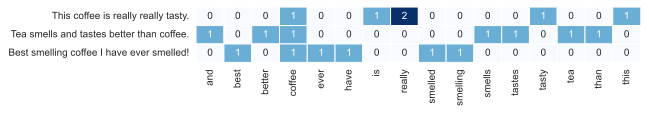

In [32]:
plt.figure(figsize=(8, 1))
g = sns.heatmap(df, cmap='Blues', annot=True, cbar=False, linewidths=1)

This is called a **document-term matrix**.

- We could use `max_df` to remove the term "coffee" since it occurs in every document. This is one example of extracting *informative* features from text; i.e., the term "coffee" doesn't provide new information for each document.
- Also, we can already see that some of these words give us more information than others. For example, "smelling" and "smells" mean roughly the same thing, and "had"/"have" aren't really necessary for understanding reviews.

This is why we use the filtering in spaCy.

In [33]:
docs = nlp.pipe(corpus_raw)
corpus_clean = [tokenizer(d, True) for d in docs]
corpus_clean

['coffee tasty', 'tea smell taste well coffee', 'good smell coffee smell']

In [35]:
cv = CountVectorizer(ngram_range=(1, 1),
                     max_df=0.9,
                     min_df=1,
                     max_features=None,
                     binary=False)

X = cv.fit_transform(corpus_clean)

df = pd.DataFrame(X.toarray(),
                  index=corpus_raw,
                  columns=cv.get_feature_names())

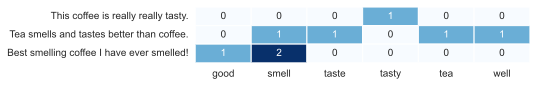

In [36]:
plt.figure(figsize=(6, 1))
g = sns.heatmap(df, cmap='Blues', annot=True, cbar=False, linewidths=1)

In [38]:
cv = CountVectorizer(ngram_range=(2, 2),  # use (1, 2) for unigrams *and* bigrams
                     max_df=0.9,
                     min_df=1,
                     max_features=None,
                     binary=False)

X = cv.fit_transform(corpus_clean)

df = pd.DataFrame(X.toarray(),
                  index=corpus_clean,
                  columns=cv.get_feature_names())

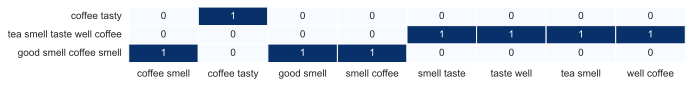

In [39]:
plt.figure(figsize=(10, 1))
g = sns.heatmap(df, cmap='Blues', annot=True, cbar=False, linewidths=1)

Now these vectors are a bit more meaningful. Notice, in a way, bigrams are a contrived way to capture context in textual data.

### TFIDF Vectorizer

Downsides of Count Vectorizer:

- Counts can be too simplistic
- High counts can dominate, especially for high frequency words or long documents
- Each word is treated equally, when some terms might be more "important" than others

We define TFIDF as:

$$
\text{TF-IDF} = \text{term frequency} * \text{inverse document frequency}
$$

where:

$$
\begin{align*}
\text{term frequency} &= \frac{\text{term count in document}}{\text{total terms in document}} \\[8pt]
\text{inverse document frequency} &= \log\bigg(\frac{\text{total number of documents} + 1}{\text{number of documents with term} + 1}\bigg)
\end{align*}
$$

This measure is calculated for every term-document combination:

- The **term frequency** measures the "density" of a word in a document
- The **inverse document frequency** (without the $\log$) measures the size of the corpus *in terms of* the number of documents containing the term. E.g., if IDF=5 then the corpus is 5 times the size of the "sub-corpus" of documents containing the term. The $\log$ dampens the effect of the inverse document frequency as the denominator gets very small or the numerator gets very large.

So, we can think of TF as the "main" measure, and IDF as the "scaling" factor:

- Very common words across all documents will get a lower score.
- Rare words considering all documents get a higher score.

In [42]:
cv = TfidfVectorizer(max_df=1.0,
                     min_df=1,
                     max_features=None)

X = cv.fit_transform(corpus_clean)

df = pd.DataFrame(X.toarray(),
                  index=corpus_clean,
                  columns=cv.get_feature_names())

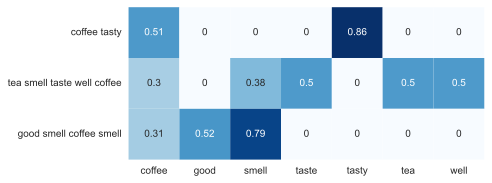

In [43]:
sns.heatmap(df, square=True, cmap='Blues', annot=True, cbar=False);

## Topic Modeling

### Matrix Decomposition

The document term matrix $X$ is a matrix just like any other in Linear Algebra. Just so, it defines a row space (the documents represented as linear combinations of terms), and column space (terms represented as a linear combination of documents). With this, there are a few matrix decomposition methods we can use to extract further information about these documents and terms.

In [44]:
from sklearn.decomposition import TruncatedSVD, NMF, PCA

### Singular Value Decomposition

Singular Value Decomposition is a guaranteed decomposition for any rectangular matrix. It creates the following equality:

$$
X = U\Sigma V^\top
$$

**Breifly**:
- Each row of $U$ represents the corresponding document in terms of "topics directions" along the columns.
- The rows of $V$ (columns of $V^\top$) represent similarly represented version of the terms.
- The $\Sigma$ matrix contains the "variance explained" by each of these topics, sorted in descending order.

As far as naming goes:

- The analysis of these resulting matrices is called **Principal Components Analysis (PCA)**.
- When used with text data, this analysis is called **Latent Semantic Analysis (LSA)**.

In [45]:
# we need a list/array of strings to vectorize
corpus = df_coffee['spacy_doc'].apply(tokenizer, args={'join_tokens':True})

In [46]:
corpus.shape

(2092,)

In [47]:
cv = TfidfVectorizer(max_df=0.9,
                     min_df=0.1,
                     max_features=None)

X = cv.fit_transform(corpus)
# df = pd.DataFrame(X, index=corpus, columns=cv.get_feature_names_out())

In [48]:
X.shape

(2092, 65)

Note, we use `TruncatedSVD` here because it's a more efficient implementation of SVD. PCA centers the data before running the algorithm, which is more "appropriate" but takes more time. This does cause a few inconsistencies in the "sorted" $\Sigma$.

In [49]:
lsa = TruncatedSVD(n_components=5)  # results only change for larger (unseen) values

doc_topic = lsa.fit_transform(X)
lsa.explained_variance_ratio_

array([0.00488089, 0.08197357, 0.04778306, 0.0467816 , 0.03500512])

In [50]:
doc_topic = pd.DataFrame(doc_topic.round(3),
                         index=df_coffee['desc_1'])
# doc_topic.head()

In [51]:
topic = 1
n_docs = 5

print(f"Top Documents for topic {topic}:\n")

for doc in doc_topic[topic].abs().sort_values(ascending=False).iloc[:n_docs].index:
    print(doc, '\n')

Top Documents for topic 1:

Sweetly floral and delicately cocoa-toned. Honeysuckle, cocoa nib, Concord grape, agave, lemon-thyme in aroma and cup. High-toned structure with juicy, confident acidity; buoyant, lively, viscous mouthfeel. Honeysuckle and cocoa nib characterize the sweet finish. 

Evaluated as espresso. Roast-rounded, chocolaty. Dark chocolate, gardenia, gently scorched cedar, molasses, prune in aroma and small cup. Viscous, creamy mouthfeel; chocolaty, slightly smoky finish. In three parts milk, floral and chocolate notes preside.  

Evaluated as espresso. Fruit-forward, chocolaty. Dark chocolate, black cherry, lily, molasses, cedar in aroma and small cup. Very syrupy mouthfeel; crisp, chocolaty finish. In three parts milk, dark chocolate notes take center stage, supported by notes of black cherry and lily. 

Evaluated as espresso. Bittersweet, richly pungent, chocolaty and floral. Dark chocolate, plum, cedar, magnolia in aroma and small cup. Plump, satiny mouthfeel; bitte

In [53]:
topic_term = pd.DataFrame(lsa.components_.round(3),
                          columns = cv.get_feature_names())

topic_term

,acidity,almond,bake,balanced,bright,brisk,butter,cedar,center,chocolate,...,sweet,sweetly,syrup,syrupy,tart,tone,undertone,velvety,vibrant,zest
0,0.192,0.124,0.090,0.103,0.117,0.072,0.068,0.167,0.082,0.256,...,0.280,0.146,0.079,0.144,0.195,0.249,0.077,0.070,0.066,0.148
1,0.072,-0.025,-0.142,0.065,0.120,-0.019,-0.019,-0.107,-0.003,-0.461,...,0.034,0.029,0.041,0.038,0.113,0.031,-0.016,-0.046,0.070,0.040
2,0.039,0.064,0.302,-0.044,-0.125,0.195,0.060,0.144,-0.007,-0.071,...,0.098,-0.059,0.059,-0.146,-0.107,0.110,0.059,0.124,-0.089,0.017
3,-0.121,0.006,-0.115,-0.008,0.009,-0.086,0.030,0.065,-0.013,-0.029,...,-0.173,-0.039,-0.047,-0.042,0.032,0.098,0.005,-0.015,-0.017,0.010
4,-0.084,-0.173,-0.137,0.009,-0.168,-0.034,-0.084,-0.087,-0.062,-0.078,...,0.084,-0.143,-0.062,0.045,-0.367,-0.064,0.025,0.022,-0.053,-0.055


In [54]:
# the third "topic"
topic = 2
n_terms = 10

topic_term.T[topic].abs().sort_values(ascending=False).iloc[:n_terms]

bake          0.302
sandalwood    0.265
dark          0.256
nut           0.236
flavor        0.217
savory        0.214
juicy         0.205
cut           0.202
hazelnut      0.199
brisk         0.195
Name: 2, dtype: float64

### Non-Negative Matrix Factorization

[NMF](https://en.wikipedia.org/wiki/Non-negative_matrix_factorization) is very similar to SVD. Here, we have the following decomposition.

$$
X = WH
$$

In this case though, all values in $W$ and $H$ are positive, and we can *approximate* this decomposition because all values in $X$ are positive.

In [55]:
nmf = NMF(4)  # here, the number will change the results
doc_topic = nmf.fit_transform(X)

/Users/shreshtvenkatraman/opt/anaconda3/lib/python3.9/site-packages/sklearn/decomposition/_nmf.py:312: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(("The 'init' value, when 'init=None' and "


In [56]:
doc_topic = pd.DataFrame(doc_topic.round(3),
                         index=df_coffee['desc_1'])
# doc_topic.head()

In [57]:
topic = 1
n_docs = 5

print(f"Top Documents for topic {topic}:\n")

for doc in doc_topic[topic].abs().sort_values(ascending=False).iloc[:n_docs].index:
    print(doc, '\n')

Top Documents for topic 1:

Evaluated as espresso. Fruit-forward, chocolaty. Dark chocolate, black cherry, lily, molasses, cedar in aroma and small cup. Very syrupy mouthfeel; crisp, chocolaty finish. In three parts milk, dark chocolate notes take center stage, supported by notes of black cherry and lily. 

Evaluated as espresso. Bittersweet, richly pungent, chocolaty and floral. Dark chocolate, plum, cedar, magnolia in aroma and small cup. Plump, satiny mouthfeel; bittersweet and chocolaty in the finish. Chocolate and flowers dominate in three parts milk.  

Evaluated as espresso. Deeply chocolaty, balanced, roast-rounded. Dark chocolate, nectarine, molasses, gently scorched cedar, rhododendron in aroma and small cup. Full, satiny mouthfeel; crisp, chocolaty finish. In three parts milk the dark chocolate notes are amplified, as are the florals 

Evaluated as espresso. Roast-rounded, chocolaty. Dark chocolate, gardenia, gently scorched cedar, molasses, prune in aroma and small cup. Vis

In [59]:
topic_term = pd.DataFrame(nmf.components_.round(3),
                          columns = cv.get_feature_names())

topic_term

,acidity,almond,bake,balanced,bright,brisk,butter,cedar,center,chocolate,...,sweet,sweetly,syrup,syrupy,tart,tone,undertone,velvety,vibrant,zest
0,0.693,0.290,0.000,0.454,0.640,0.000,0.062,0.017,0.261,0.599,...,1.056,0.667,0.173,0.906,0.739,0.446,0.068,0.000,0.413,0.482
1,0.000,0.167,0.000,0.045,0.000,0.000,0.128,0.582,0.110,1.523,...,0.028,0.130,0.000,0.167,0.172,0.384,0.173,0.114,0.000,0.132
2,0.557,0.493,0.979,0.106,0.000,0.622,0.307,0.672,0.214,0.722,...,0.913,0.242,0.300,0.032,0.202,0.715,0.281,0.446,0.000,0.359
3,0.532,0.177,0.000,0.393,0.527,0.018,0.122,0.307,0.181,0.000,...,0.544,0.361,0.249,0.334,0.764,0.797,0.208,0.052,0.282,0.408


In [60]:
topic = 0
n_terms = 10

topic_term.T[topic].sort_values(ascending=False).iloc[:n_terms]

savory        1.743
sweet         1.056
long          0.953
flavor        0.914
syrupy        0.906
juicy         0.832
sandalwood    0.831
structure     0.822
resonant      0.778
richly        0.759
Name: 0, dtype: float64

In [61]:
topic = 1
n_terms = 10

topic_term.T[topic].sort_values(ascending=False).iloc[:n_terms]

chocolate    1.523
dark         1.258
milk         1.092
espresso     1.087
evaluate     1.061
small        1.059
chocolaty    0.979
cedar        0.582
fruit        0.502
floral       0.476
Name: 1, dtype: float64

As you can tell, this often produces more agreeable results than LSA.

### Latent Dirichlet Allocation (LDA)

[LDA](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.LatentDirichletAllocation.html) is a "generative" model that builds topics with the assumption that documents are generated based on a probability distribution of topics, and that topics are just a probability distribution of terms.

In [62]:
from sklearn.decomposition import LatentDirichletAllocation

In [63]:
# these parameters usually require a good bit of tuning ...
lda = LatentDirichletAllocation(n_components=5,
                                max_iter=50)

X_topics = lda.fit_transform(X)

In [64]:
df_lda = pd.DataFrame(data = X_topics,
                      index = corpus)

In [65]:
topic = 0
n_docs = 3

for d in df_lda[topic].sort_values(ascending=False).iloc[:n_docs].index:
    print(d, '\n')

evaluate espresso crisply sweet richly floral tone lavender dark chocolate red currant almond butter pink grapefruit zest aroma small cup delicate viscous mouthfeel richly dry finish center note tart fruit dark chocolate bittersweet lavender like flower chocolaty floral part milk ongoing tart fruit note 

evaluate espresso crisply sweet fruit tone pomegranate bake chocolate freesia like flower fresh cut fir orange zest aroma small cup syrupy smooth mouthfeel deeply sweet floral- citrus tone finish part milk crisp chocolate note amplify support pomegranate fir 

evaluate espresso deeply sweetly nut tone almond butter magnolia dark chocolate crisp pear fresh cut cedar aroma small cup viscous smooth mouthfeel crisply sweet tart finish cappuccino scale milk amplify magnolia dark chocolate note 



In [66]:
topic = 1
n_docs = 3

for d in df_lda[topic].sort_values(ascending=False).iloc[:n_docs].index:
    print(d, '\n')

bright richly chocolaty dark chocolate pink grapefruit zest plum almond lemon thyme aroma cup sweet tart structure brisk acidity velvety mouthfeel chocolaty nut tone finish undertone fresh cut cedar 

richly sweet tart deeply berry tone fresh blueberry rhododendron meyer lemon zest dark chocolate fresh cut oak aroma cup sweet tone structure gentle round acidity syrupy smooth mouthfeel finish consolidate note blueberry dark chocolate oak undertone 

balanced deep chocolaty lavender red currant gently scorch cedar bake chocolate meyer lemon zest aroma cup roundly sweet tart structure bright balanced acidity crisp velvety mouthfeel almond note surface sweetly roast tone finish 



In [70]:
df_lda_terms = pd.DataFrame(data = lda.components_,
                            columns = cv.get_feature_names())

In [71]:
topic = 0
n_terms = 10

df_lda_terms.T[topic].sort_values(ascending=False).iloc[:n_terms]

milk         74.434704
espresso     69.640757
small        69.544904
evaluate     67.766221
chocolate    55.421693
chocolaty    39.096066
dark         32.739816
cedar        28.229895
tone         26.110232
floral       25.828419
Name: 0, dtype: float64

In [72]:
topic = 1
n_terms = 10

df_lda_terms.T[topic].sort_values(ascending=False).iloc[:n_terms]

bake         88.688539
sweet        73.507060
fresh        72.171998
cut          68.909672
chocolate    66.956591
hazelnut     66.003664
nut          61.394261
tone         60.400817
brisk        58.638912
oak          52.220372
Name: 1, dtype: float64

### Anchored Correlation Explanation (CorEx)

[CorEx](https://github.com/gregversteeg/corex_topic) is a discriminative model, which starts from $X$ (documents/words) to determine $Y$ (topics). CorEx looks for groups of words that are in the same topic, a.k.a. have high Total Correlation (TC), or convey the same information.

- If words are **tightly related** (always appear together in the same topic/document), TC will be high. This is a good topic.
- If the words are all **independent** (never appear together in the same document or topic), TC = 0. This is a bad topic.
- CorEx creates a partition across terms. I.e., **terms can only occur in a single topic**.

CorEx roughly follows this algorithm:
1. Look for a group of words that are both as broad (in many documents) and overlapping as possible (both together will lead to high TC), and call this a topic.
2. Repeat the process for another set of words (not overlapping with your previous group) with as high a TC as possible, and call this the next topic.

As we create more topics, each subsequent topic will have lower TC.

In [73]:
from corextopic import corextopic as ct

ModuleNotFoundError: No module named 'corextopic'

In [74]:
# CorEx requires count data
cv = CountVectorizer(max_df=0.9,
                     min_df=0.1,
                     max_features=None)

X = cv.fit_transform(corpus)

In [ ]:
topic_model = ct.Corex(n_hidden=5,                        # number of topics
                       words=cv.get_feature_names_out(),  # list of terms in corpus
                       seed=1)

doc_topic = topic_model.fit_transform(X, words=cv.get_feature_names_out(), docs=corpus)

In [ ]:
# Print all topics from the CorEx topic model
topics = topic_model.get_topics()

for n, topic in enumerate(topics):
    topic_words,_,_ = zip(*topic)
    print(f"{n}: " + ','.join(topic_words))

Take a look at how you can use [anchor words](https://github.com/gregversteeg/corex_topic/tree/master#using-anchor-words) to guide the topic creation.

## ScatterText

Scattertext is great for
- Visually inspecting text
- Comparing/Contrasting corpora
- And more...

Check out Jason Kessler's GitHub project for more information: [here](https://github.com/JasonKessler/scattertext).

In [75]:
import scattertext as st

ModuleNotFoundError: No module named 'scattertext'

In [ ]:
convention_df = st.SampleCorpora.ConventionData2012.get_data()

In [ ]:
convention_df.head()

In [ ]:
corpus = st.CorpusFromPandas(convention_df,
                             category_col='party',
                             text_col='text',
                             nlp=st.whitespace_nlp_with_sentences
                            ).build()

In [ ]:
html = st.produce_scattertext_explorer(
        corpus,
        category='democrat',
        category_name='Democratic',
        not_category_name='Republican',
        minimum_term_frequency=10,
        pmi_threshold_coefficient=5,
        width_in_pixels=1000,
        metadata=convention_df['speaker'],
        )

In [ ]:
with open('demo.html', 'wb') as f:
    f.write(html.encode('utf-8'))

## Sentiment Analysis with VADER

According to the documentation:

    VADER (Valence Aware Dictionary and sEntiment Reasoner) is a lexicon and rule-based sentiment analysis tool that is specifically attuned to sentiments expressed in social media. [...]
    
    Sentiment ratings from 10 independent human raters (all pre-screened, trained, and quality checked for optimal inter-rater reliability). Over 9,000 token features were rated on a scale from "[–4] Extremely Negative" to "[4] Extremely Positive", with allowance for "[0] Neutral (or Neither, N/A)".

In [259]:
! pip install vaderSentiment

  Using cached vaderSentiment-3.3.2-py2.py3-none-any.whl.metadata (572 bytes)
Using cached vaderSentiment-3.3.2-py2.py3-none-any.whl (125 kB)


In [260]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [262]:
sentences = ["VADER is smart, handsome, and funny.",  # positive sentence example
             "VADER is smart, handsome, and funny!",  # punctuation emphasis handled correctly (sentiment intensity adjusted)
             "VADER is very smart, handsome, and funny.", # booster words handled correctly (sentiment intensity adjusted)
             "VADER is VERY SMART, handsome, and FUNNY.",  # emphasis for ALLCAPS handled
             "VADER is VERY SMART, handsome, and FUNNY!!!", # combination of signals - VADER appropriately adjusts intensity
             "VADER is VERY SMART, uber handsome, and FRIGGIN FUNNY!!!", # booster words & punctuation make this close to ceiling for score
             "VADER is not smart, handsome, nor funny.",  # negation sentence example
             "The book was good.",  # positive sentence
             "At least it isn't a horrible book.",  # negated negative sentence with contraction
             "The book was only kind of good.", # qualified positive sentence is handled correctly (intensity adjusted)
             "The plot was good, but the characters are uncompelling and the dialog is not great.", # mixed negation sentence
             "Today SUX!",  # negative slang with capitalization emphasis
             "Today only kinda sux! But I'll get by, lol", # mixed sentiment example with slang and constrastive conjunction "but"
             "Make sure you :) or :D today!",  # emoticons handled
             # "Catch utf-8 emoji such as such as 💘 and 💋 and 😁",  # emojis handled, ignored for seaborn plot below
             "Not bad at all"  # Capitalized negation
             ]

In [263]:
df_sentiment = []

analyzer = SentimentIntensityAnalyzer()

for sentence in sentences:
    vs = analyzer.polarity_scores(sentence)
    df_sentiment.append(vs)

In [264]:
df_sentiment = pd.DataFrame(df_sentiment,
                            index = sentences)

In [331]:
df_sentiment

,neg,neu,pos,compound
"VADER is smart, handsome, and funny.",0.000,0.254,0.746,0.8316
"VADER is smart, handsome, and funny!",0.000,0.248,0.752,0.8439
"VADER is very smart, handsome, and funny.",0.000,0.299,0.701,0.8545
"VADER is VERY SMART, handsome, and FUNNY.",0.000,0.246,0.754,0.9227
"VADER is VERY SMART, handsome, and FUNNY!!!",0.000,0.233,0.767,0.9342
"VADER is VERY SMART, uber handsome, and FRIGGIN FUNNY!!!",0.000,0.294,0.706,0.9469
"VADER is not smart, handsome, nor funny.",0.646,0.354,0.000,-0.7424
The book was good.,0.000,0.508,0.492,0.4404
At least it isn't a horrible book.,0.000,0.678,0.322,0.4310
The book was only kind of good.,0.000,0.697,0.303,0.3832


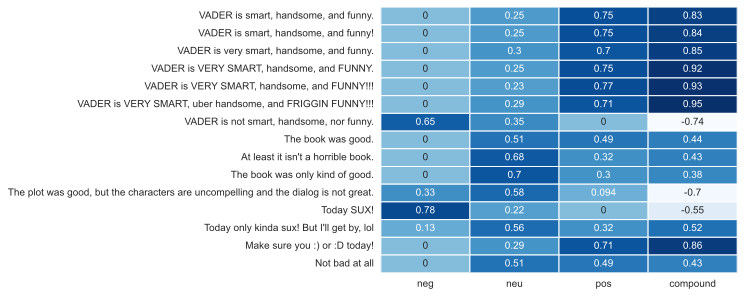

In [265]:
sns.heatmap(df_sentiment, cmap='Blues', annot=True, cbar=False, linewidths=1);

# EXERCISES

## Exercise 1

Using a book from [Project Gutenberg](https://www.gutenberg.org/), get the text data directly from its URL using the `requests` package. Break the book into 50 or more sensible "chunks" like chapters or paragraphs, organizing them into a list.

Load this data into a spaCy pipeline and analyze either Named Entities or Parts of Speech in each chunk.

Provide your analysis: What types of entities or parts of speech are common, and what are uncommon? What insights can you draw from these patterns?

*Note*: Do not download any file, make use of URL in your code.

In [238]:
import requests
import json
import pandas as pd
import re

### Getting the book from Project Guttenburg Using Requests:

In [308]:
book = requests.get("https://www.gutenberg.org/cache/epub/1946/pg1946.txt")

### Removing Introduction and other Irrelevant Content:

In [309]:
relevant_text = book.text[51425:630457]

### Splitting into Chunks

In [310]:
## The \r\n\r\n\r\n represents a section break in the txt file. 

chunk_list = relevant_text.split("\r\n\r\n\r\n")

## Book only has 43 Chapters: 
len(chunk_list)

120

### SpaCy Pipeline:


In [161]:
nlp = spacy.load('en_core_web_sm')

### Finding the most common Entity Labels in each chunk:

In [179]:
out = []

for i in chunk_list:
    entity_dict = {}
    doc = nlp(i)
    for e in doc.ents:
        #print(e.label_)
        if e.label_ in entity_dict.keys():
            entity_dict[e.label_]+= 1
        else:
            entity_dict[e.label_] = 1
    out.append(entity_dict)

In [223]:
chap_nums = ['Chapter'+ str(i) for i in range(1,121)]
max_labels = [max(list(i.keys()), default = 'None') for i in out]
max_vals = [max(list(i.values()), default = 'None') for i in out]

In [226]:
df = pd.DataFrame({'Chapter': chap_nums, 'Most Frequent Label': max_labels, 'Frequency': max_vals})
df

,Chapter,Most Frequent Label,Frequency
0,Chapter1,WORK_OF_ART,18
1,Chapter2,ORG,9
2,Chapter3,EVENT,1
3,Chapter4,GPE,2
4,Chapter5,ORG,6
...,...,...,...
115,Chapter116,WORK_OF_ART,15
116,Chapter117,WORK_OF_ART,22
117,Chapter118,WORK_OF_ART,55
118,Chapter119,QUANTITY,7


Most Common Entity Label = **Work of Art**
Least Common Entity Label = **Event**

### Analysis:

The most common label seems to be 'Work of Art" which is failry strange given that this work has very little to do with art. I suspect that we may have to use a different model, or clean up our documents to ensure that we remove stop words and other irrelevaant text

## Exercise 2

Apply spaCy to extract the most meaningful content from your documents, considering options like excluding stop words or focusing on nouns (i.e. preprocessing and filtering).

Perform a sentiment analysis on the refined data. Create visualization of your result.

Summarize your results by explaining how sentiment changes across sections.

## Refining our Dataset:

### Removing Non Alpha-Numeric Characters & Generating pipeline objects:

In [315]:
for i in range(len(chunk_list)):
    chunk_list[i] = re.sub(r'\W+',' ',chunk_list[i])
    chunk_list[i] = nlp(chunk_list[i])

### Removing Stopwords and Numbers

In [319]:
def tokenizer(doc, join_tokens):
    '''
    Tokenize a single spaCy `doc`.

    join_tokens : bool
        Whether we want to return a list of strings or
        a list of lists. If True, join with space (" ").
    '''

    # collect lemmas that meet the following criteria:
    
    
    
    tokens = [w.lemma_.lower() for w in doc if
              (not w.is_stop
               and not w.is_punct
               and not w.like_num) \
              or (w.lemma_ == 'not')]

    if join_tokens:
        return ' '.join(tokens)
    else:
        return tokens

In [324]:
tokenized_list = []
for chunk in chunk_list:
    tokenized_list.append(tokenizer(chunk,join_tokens = True))
    

In [327]:
len(tokenized_list)

120

### VADER Sentiment Analysis:

In [328]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [329]:
chunk_sentiment = []

analyzer = SentimentIntensityAnalyzer()

for chunk in tokenized_list:
    vs = analyzer.polarity_scores(chunk)
    chunk_sentiment.append(vs)

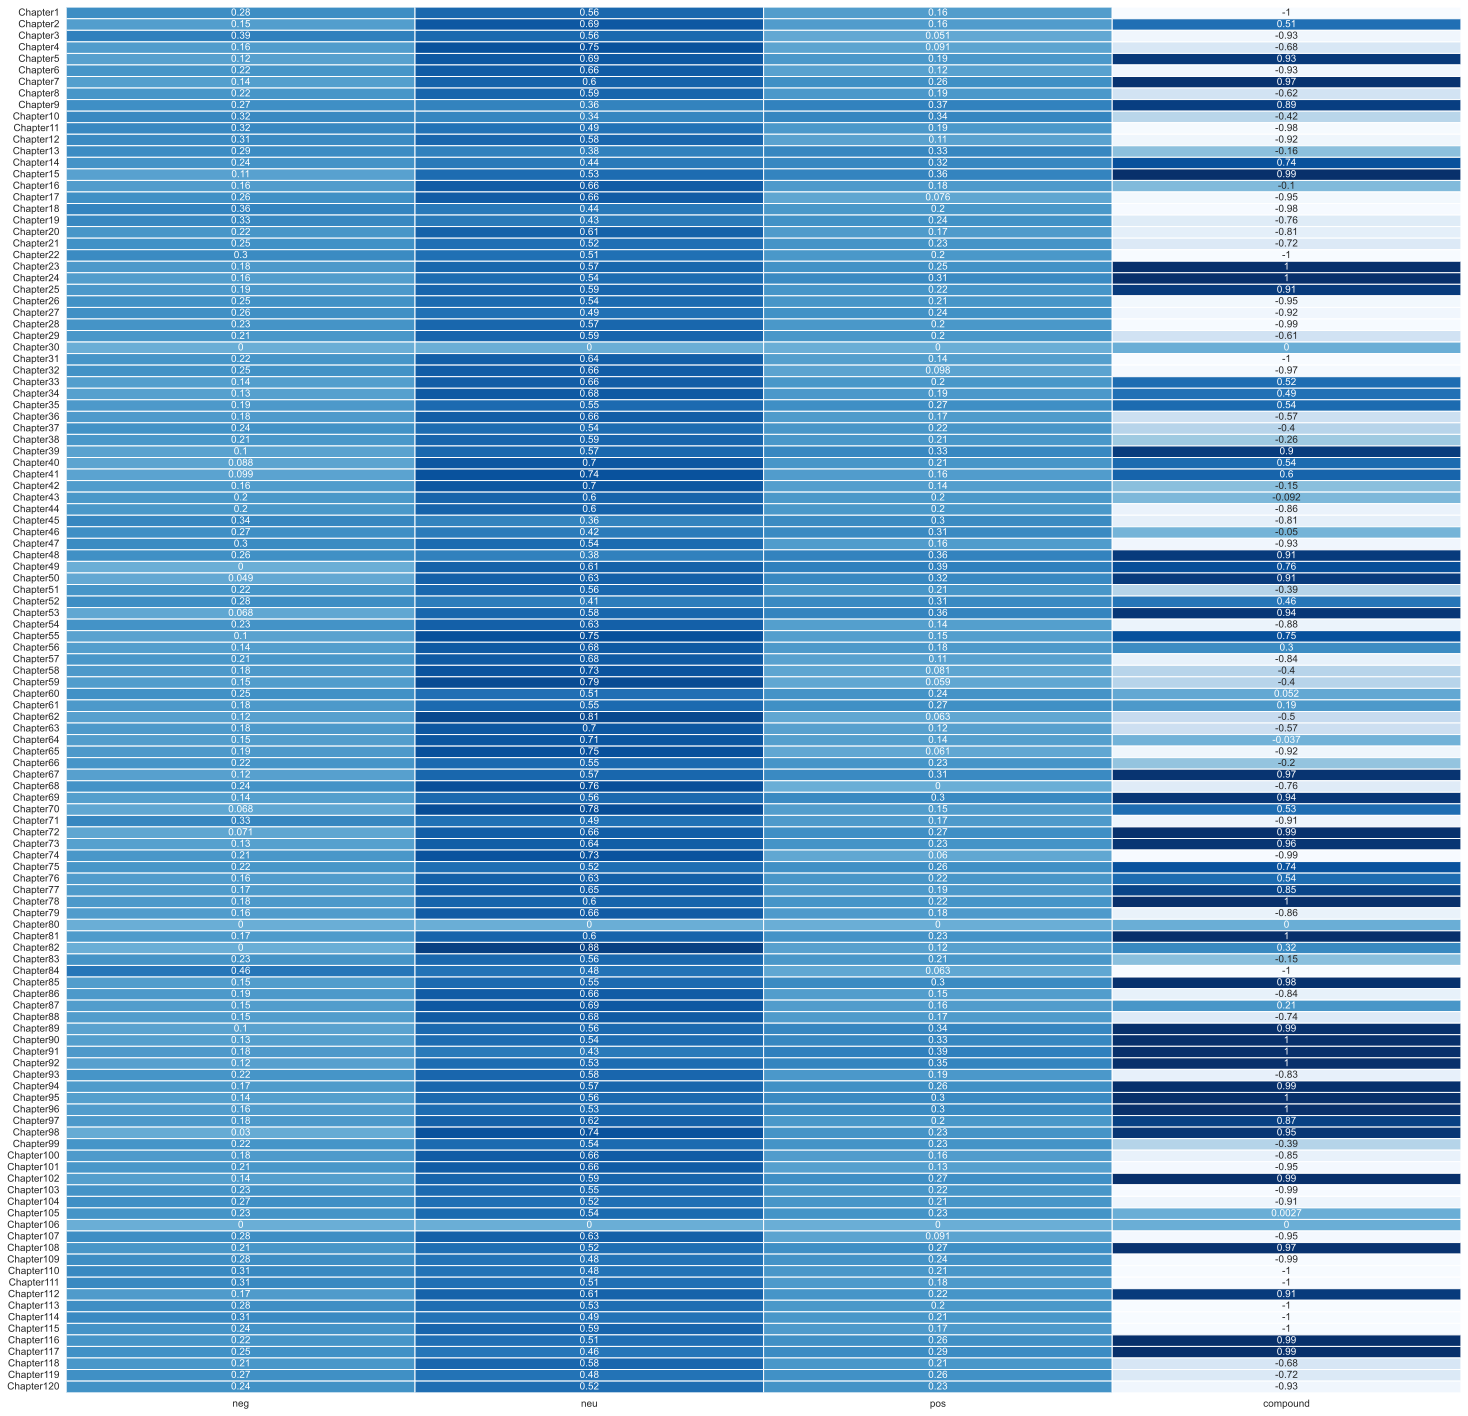

In [337]:
df_sentiment = pd.DataFrame(chunk_sentiment,
                            index = chap_nums)

fig, ax = plt.subplots(figsize=(25,25))

sns.heatmap(df_sentiment, cmap='Blues', annot=True, cbar=False, linewidths=1);

### Analysis:

From the above heat-map it appears as though the majority of chapters in this book have a **negative** character. This is best reflected in the **composite-scoree** section of our Heat Map. 

This is fairly consistent with the theme of the book "On War" which is a record of the Napoleonic Wars. Therefore from the general theme of the book we can understand that this Sentiment Analysis is fairly accurate. 